# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/25/25, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to draw a systems diagram and identify the type
    of a feedback.
-   Problem 2 asks you to model contaminant concentrations in a river
    and use simulation to compare the concentrations to a regulatory
    standard.
-   Problem 3 asks you to explore the implications of an ice-albedo
    feedback in the Earth’s climate system by understanding the
    equilibria of the modeled system and their stabilities.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

In [1]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 30 Points)

### Problem 1 (5 points)

Draw a systems diagram for the relationship between global mean
temperature, atmospheric CO<sub>2</sub> concentrations, and ocean
CO<sub>2</sub> concentrations. What are the signs of the interactions
between these components and why? What does this suggest about the
overall feedback between temperature and the ocean carbon cycle?

> **Tip**
>
> Think about Henry’s law for CO<sub>2</sub>.

### Problem 2 (15 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$ and is deposited by the atmosphere along the
river at a rate of 54 kg/km/d. 

<figure>
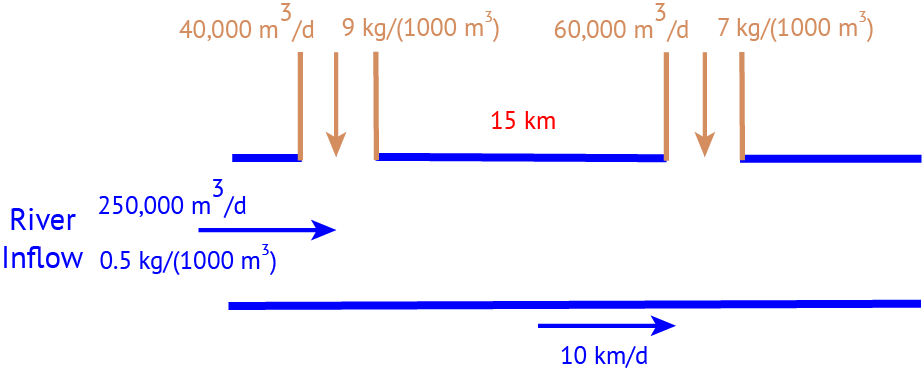
<figcaption aria-hidden="true">Schematic of the river system in Problem
2</figcaption>
</figure>

#### Problem 2.1

Draw a systems diagram with the relevant control volume(s) denoted and
any relevant in/out-flows between these boxes. How did you decide how
many boxes were needed?

#### Problem 2.2

Develop a model for the concentration of CRUD downriver by formulating
and solving the appropriate differential equation(s) analytically.

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

#### Problem 2.3

Determine if the system in compliance with a regulatory limit of
$2.3\ \text{kg}/(1000 \text{m}^3)$. You can do this analytically or
computationally.

### Problem 3 (10 points)

In class, we discussed the ice-albedo feedback and its possible
influence on melting the hypothesized [“Snowball
Earth”](https://en.wikipedia.org/wiki/Snowball_Earth). In this problem,
we’ll introduce a simple model of the Earth’s energy balance with
includes this feedback and examine the stability of the climate.

This simple model of the energy balance (averaged over the entire
planet) is:

<span id="eq-climate">$$
\underbrace{C\frac{dT}{dt}}_{\text{change in heat}} = \underbrace{\frac{(1-\alpha)S}{4}}_{\text{incoming radiation}} - \underbrace{(A - BT)}_{\text{outgoing radiation}} + \underbrace{a\ln \left(\frac{[CO_2]}{[CO_2]_{PI}}\right)}_{\text{greenhouse effect}},
 \qquad(1)$$</span>

where:

-   $T$ is the Earth’s global mean temperature (in $^\circ\text{C}$);
-   $C$ is the heat capacity of the atmosphere and shallow ocean, taken
    to be $51\ \text{J}/\text{m}^2/^\circ\text{C}$;
-   $\alpha$ is the planetary albedo, or the fraction of incoming
    radiation reflected by the Earth, which has a present-day value of
    approximately 0.3;
-   $S$ is the solar constant, or the amount of solar radiation received
    by the Earth averaged over area, which has a present-day value of
    $1368\ \text{W}/\text{m}^2$ but during the Neoproteorozoic Era had a
    value of $1272\ \text{W}/\text{m}^2$ (this is divided by four
    because the Earth is a sphere but $S$ is the radiation captured by a
    disc with radius equal to that of the Earth);
-   $A$ and $B$ are coefficients from the linearization of outgoing
    radiation physics, and have corresponding values
    $B=-1.3\ \text{W}/\text{m}^2/^\circ\text{C}$ (estimated from a
    number of lines of evidence about the sensitivity of outgoing
    radiation to temperature; this is negative due to a sign convention
    about the direction of incoming vs. outgoing radiation) and
    $A=221.2\ \text{W}/\text{m}^2$ (estimated by assuming the
    pre-industrial temperature of $14^\circ\text{C}$ was stable without
    anthropogenic greenhouse gas emissions).

We will ignore the greenhouse effect term as we are considering the
Earth system well before humans were around.

#### Problem 3.1

Discretize the climate model
(<a href="#eq-climate" class="quarto-xref">Equation 1</a>) using forward
Euler integration and a time step of $\Delta t = 1$ yr.

#### Problem 3.2

Rather than assuming a constant value for the albedo $\alpha$, we will
represent the ice-albedo feedback by letting $\alpha$ depend on $T$:

$$\alpha(T) = 
    \begin{cases} 
        \alpha_i & \quad \text{if } T \leq -10^\circ \text{C} \\
        \alpha_i + (\alpha_0 - \alpha_i)((T+10) / 20) & \quad \text{if } -10^\circ \text{C} \leq T \leq 10^\circ \text{C} \\
        \alpha_0 & \quad \text{if } T \geq 10^\circ \text{C}.
    \end{cases}$$

Let $\alpha_i = 0.5$ and $\alpha_0 = 0.3$. Simulate the simple climate
model using the Neoprotereozoic value of $S$ with temperature-varying
albedo for initial values of $T$ spanning
$-60^\circ\text{C} \leq T_0 \leq 30^\circ\text{C}$ over a period of 200
years. Plot the temperature trajectories. How many equilibria are there
and what are their stabilities?

#### Problem 3.3

One might hypothesize that one cause for the transition from Snowball
Earth (the stable frozen equilibrium from Problem 3.2) was an increasing
amount of incoming solar radiation (as expressed by an increase in $S$).
Examine this hypothesis using our simple model. Is this factor enough to
cause the planet to warm to the pre-industrial temperature of
$14^\circ\text{C}$?

## References

List any external references consulted, including classmates.